In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset_dir = 'dataset'

train_df = pd.read_csv(os.path.join(dataset_dir, 'train.csv'))
train_df.dropna(subset=['text'], inplace=True)

test_df = pd.read_csv(os.path.join(dataset_dir, 'test.csv'))
test_df.dropna(subset=['text'], inplace=True)

In [3]:
train_df

,text,label
0,jpmorgan reel expectation beyond meat,-1
1,nomura point booking weakness carnival royal c...,-1
2,cemex cut credit suisse jp morgan weak buildin...,-1
3,btig research cut neutral,-1
4,funko slide piper jaffray pt cut,-1
...,...,...
9538,week gainer loser stoxx europe 50 dec 26 econo...,0
9539,tupperware brand among consumer gainer unileve...,0
9540,vtv therapeutic lead healthcare gainer myomo b...,0
9541,work xpo pyx amkr among hour mover,0


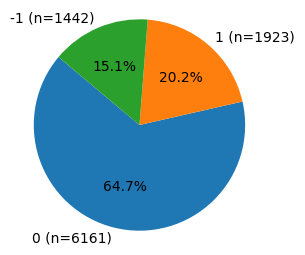

In [4]:
counts = train_df['label'].value_counts()
labels = counts.index

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=[f'{label} (n={count})' for label, count in zip(labels, counts)], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [5]:
counts = train_df['label'].value_counts()
min_count = counts.min()
print(counts)

train_df_balansed = pd.DataFrame()
for label in train_df['label'].unique():
    group = train_df[train_df['label'] == label]
    sampled_group = group[:min_count]
    train_df_balansed = pd.concat([train_df_balansed, sampled_group])

train_df = train_df_balansed.reset_index(drop=True)

label
 0    6161
 1    1923
-1    1442
Name: count, dtype: int64


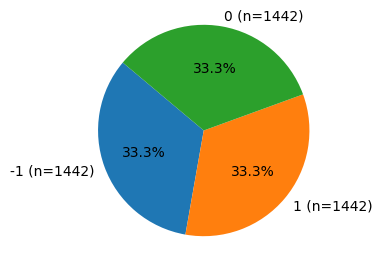

In [6]:
counts = train_df['label'].value_counts()
labels = counts.index

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=[f'{label} (n={count})' for label, count in zip(labels, counts)], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [7]:
train_df

,text,label
0,jpmorgan reel expectation beyond meat,-1
1,nomura point booking weakness carnival royal c...,-1
2,cemex cut credit suisse jp morgan weak buildin...,-1
3,btig research cut neutral,-1
4,funko slide piper jaffray pt cut,-1
...,...,...
4321,junk bond scare rising one care people buying ...,0
4322,keurig dr pepper refinances extend maturity ke...,0
4323,landsbankinn hf covered bond offering result s...,0
4324,london stock exchange notice regarding contemp...,0


In [8]:
# vectorizer = TfidfVectorizer()
# vectorizer = TfidfVectorizer(max_features=20)
# vectorizer = TfidfVectorizer(max_features=100)
# vectorizer = TfidfVectorizer(max_features=1000)
vectorizer = TfidfVectorizer(max_features=5000)

In [9]:
train_features = vectorizer.fit_transform(train_df['text'])
X_train = pd.DataFrame(train_features.toarray(), columns=vectorizer.get_feature_names_out())

y_train = train_df['label']

In [10]:
X_train

,001,002,003,004,005,0056,006,007,008,009,...,ziopharm,zogenixs,zomedica,zone,zonnecelmodule,zoom,zscaler,zwillinger,zynex,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_features = vectorizer.transform(test_df['text'])
X_test = pd.DataFrame(test_features.toarray(), columns=vectorizer.get_feature_names_out())

y_test = test_df['label']

In [12]:
X_test

,001,002,003,004,005,0056,006,007,008,009,...,ziopharm,zogenixs,zomedica,zone,zonnecelmodule,zoom,zscaler,zwillinger,zynex,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'GaussianNB': GaussianNB(var_smoothing=1e3),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, '\n')
    print(confusion_matrix(y_test, predictions), '\n')
    print(classification_report(y_test, predictions, zero_division=0))
    print()

Logistic Regression 

[[247  46  54]
 [353 890 320]
 [ 98  67 310]] 

              precision    recall  f1-score   support

          -1       0.35      0.71      0.47       347
           0       0.89      0.57      0.69      1563
           1       0.45      0.65      0.53       475

    accuracy                           0.61      2385
   macro avg       0.56      0.64      0.57      2385
weighted avg       0.72      0.61      0.63      2385


Random Forest 

[[ 225   62   60]
 [ 288 1002  273]
 [  94   83  298]] 

              precision    recall  f1-score   support

          -1       0.37      0.65      0.47       347
           0       0.87      0.64      0.74      1563
           1       0.47      0.63      0.54       475

    accuracy                           0.64      2385
   macro avg       0.57      0.64      0.58      2385
weighted avg       0.72      0.64      0.66      2385


Decision Tree 

[[209  61  77]
 [472 781 310]
 [116  86 273]] 

              precision    re